
# Caso de uso: Análisis exploratorio
***

##  DataLovers, S.A.

Durante este fin de semana, una nueva consultoría ha aparecido en el panorama empresarial de la ciudad. Somos una empresa joven, de unas horas de antigüedad, pero con algunos clientes importantes que necesitan soluciones a sus problemas.
***

## Welcome aboard \!

Hoy es tú primer día de trabajo y, después de haberte tomado el café a coste de la empresa y comentar el apasionante Mali-Ghana del mundial SUB-17 del fin de semana, te han asignado tu primera tarea para un nuevo cliente: **LargeInternationalCorporation, INC.**

El CEO de la empresa, un oligarca ruso sin escrupulos que hizo fortuna durante la caída del imperio sovietico con la ayuda de los amigos correctos, está preocupado por la alta tasa de abandono que tiene entre sus empleados. Parece ser que con los años Don Sergey Sokolov se ha dado cuenta de que entender los factores que se asocián con la tasa de abandono le permitirá mantener a los empleados contentos para evitar que se vayan y, quién sabe, incluso aumentar su productividad. Cómo las vacas: cuanto más felices, más leche.¹
***

## Tarea (para ayer)

No te han dado más información que un set de datos y una guía descriptiva de los campos que contiene. Así que la tarea consiste en intentar extraer la mayor cantidad de información posible de los datos y sacar alguna conclusiones para poder ayudar a reducir el número de bajas de la empresa del Sr. Sokolov.
***

## El método
Te han contratado como data scientist. Eso es lo que eres, un científico. Y la ciencia se basa en dos pilares fundamentales. La metodología y la reproducibilidad.
<br>
<br>

<div class="panel panel-success">
  <div class="panel-heading">El método científico</div>
  <div class="panel-body">
      <ol>
        <li>Observación</li>
        <li>Hipótesis</li>
        <li>Experimentación</li>
        <li>Teoría</li>
        <li>Ley</li>
      </ol>
   </div>
</div>

Una versión adaptada a los datos del método científico podría consistir en²:

1. Empezar con datos
1. Desarrollar una intuición sobre los datos y las preguntas que puede responder
1. Hacer la pregunta adecuada
1. Intentar reponderla con los datos y, si no se puede, iterar sobre los puntos anteriores hasta que tengamos una hipótesis que queremos testear.
1. Crear un entorno donde podamos probar nuestra hipótesis
1. Analizar los resultados

Otra forma de decirlo a la americana, es el proceso OSEMN,³ pronunciado awesome.

1. **O**btain data: automatizar la obtención de datos! SQL en databases, web scraping y scripting usando Python y/o shell scripts.
1. **S**crub data: los datos estan sucios. Limpialos.
1. **E**xplore data: conoce tus datos antes de empezar a filosofar
1. **M**odel data: Crea un modelo predictivo a partir de tus datos
1. I**N**terpret results: Que nos dice el modelo con respecto a los datos? Tiene sentido? Se puede interpretar?


Sencillo, verdad? Respuesta: No.


<sub>1. http://www.nacion.com/vivir/ambiente/Vacas-felices-producen-leche_0_1645235488.html</sub>

<sub> 2. [Data Driven, DJ Patil](http://www.oreilly.com/data/free/data-driven.csp). </sub>

<sub> 3. https://machinelearningmastery.com/how-to-work-through-a-problem-like-a-data-scientist/ </sub>

### 1. Preparando el entorno
***
Antes de nada, debemos preparar el entorno para poder empezar a trabajar. Importa las librerías básicas para poder realizar análisis de datos en `python` y poder visualizar los plots en el notebook.

In [1]:
# El "ipython magic" que permite ver los plots en notebooks
%matplotlib inline

# pandas bajo el alias pd
import pandas as pd

# numpy bajo el alias np
import numpy as np

# matplotlib.pyplot bajo el alias plt
import matplotlib.pyplot as plt

# seaborn bajo el alias sns
import seaborn as sns

In [2]:
sns.set_context('talk')
sns.set_style('darkgrid')

### 1. Obtención de los datos
***
Tenemos suerte y nos han pasado los datos en un csv. Importa el fichero como DataFrame de pandas y guardalo en la variable `df`

In [3]:
# importa el archivo "HR_data.csv"
df = pd.read_csv("data/HR_data.csv")


Un primer paso es ver como lucen nuestros datos. Echale un vistazo a las primeras lineas del df

### 2. Chequeo y limpieza
***
Examinemos el set de datos para ver si todo parece correcto


In [4]:
# Echale un vistazo a las columnas del set de datos
# y el tipo de dato que 

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company         int64
Work_accident              int64
left                     float64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

Parece que todos los tipos de datos corresponden o son acordes con el nombre de la columna.

In [5]:
# Que tamaño tiene nuestro set de datos?
df.shape

(14999, 10)

In [6]:
# Echale un vistazo a las primeras filas del set de datos
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1.0,0,sales,low
1,0.80,0.86,5,NaN,6,0,1.0,0,sales,medium
2,0.11,0.88,7,272.0,4,0,1.0,0,sales,medium
3,0.72,0.87,5,223.0,5,0,1.0,0,sales,low
4,0.37,0.52,2,159.0,3,0,1.0,0,sales,low


Vaya, parece que hay algún dato que falta. Aunque no lo parezca, hemos tenido suerte de que aparezca algún nulo en el head. Así no nos olvidamos de un paso clave: mirar de manera más exhaustiva si hay otras columnas que puedan contener valores nulos.

In [7]:
# Comprueba que columnas tienen valores nulos
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [8]:
# utiliza el metodo any() al final de la sentencia anterior.
df.isnull().any()

satisfaction_level        True
last_evaluation          False
number_project           False
average_montly_hours      True
time_spend_company       False
Work_accident            False
left                      True
promotion_last_5years    False
sales                    False
salary                    True
dtype: bool

In [9]:
# Comprueba las filas que tienen valores nulos
df[df['satisfaction_level'].isnull() |
   df['average_montly_hours'].isnull() |
   df['left'].isnull() |
   df['salary'].isnull()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,NaN,6,0,1.0,0,sales,medium
10,NaN,0.54,2,135.0,3,0,1.0,0,sales,low
29,0.38,0.50,2,132.0,3,0,1.0,0,accountinglow,NaN
12961,0.41,0.63,2,145.0,2,0,NaN,0,product_mng,low


In [10]:
# Tip: Podemos pasar los valores que nos devuelve el df.isnull()
# para filtrar el df. Echale un vistazo a la documentación o busca
# en stackoverflow cómo hacerlo

df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,NaN,6,0,1.0,0,sales,medium
10,NaN,0.54,2,135.0,3,0,1.0,0,sales,low
29,0.38,0.50,2,132.0,3,0,1.0,0,accountinglow,NaN
12961,0.41,0.63,2,145.0,2,0,NaN,0,product_mng,low


Que hacemos con los nulos? Depende. Se puede salvar alguno? Nos va a afectar al conjunto de los datos? Antes de responder, veamos un descriptivo básico del df.

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1.0,0,sales,low
1,0.80,0.86,5,NaN,6,0,1.0,0,sales,medium
2,0.11,0.88,7,272.0,4,0,1.0,0,sales,medium
3,0.72,0.87,5,223.0,5,0,1.0,0,sales,low
4,0.37,0.52,2,159.0,3,0,1.0,0,sales,low


In [12]:
# Realiza un análisis descriptivo del df

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14998.000000,14999.000000,14999.000000,14998.000000,14999.000000,14999.000000,14998.000000,14999.000000
mean,0.612844,0.716102,3.803054,201.046273,3.498233,0.144610,0.238098,0.021268
std,0.248635,0.171169,1.232592,49.942284,1.460136,0.351719,0.425934,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Sabemos de antes que el set de datos tiene 14999 entradas y que hay nulos en cuatro columnas. Solo en una de ellas parece que se podría salvar de forma segura ya que parece que ha habido un error en el parseo.

Vamos a arreglar primero ese valor.

In [13]:
# Encuentra la fila con valores de salary nulos 
# y guarda el indice de la fila en una variable
cols = ['sales', 'salary']
print(df[df['salary'].isnull()][cols])

idx_salary_nan = df[df['salary'].isnull()].index


            sales salary
29  accountinglow    NaN


In [14]:
# Asigna los valores correctos

df['sales'].loc[idx_salary_nan] = 'accounting'
df['salary'].loc[idx_salary_nan] = 'low'

/Users/juanito/miniconda3/envs/uib/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
cols = ['sales', 'salary']
print(df[cols].loc[idx_salary_nan])

         sales salary
29  accounting    low


Vamos a imputar el valor nulo de satisfaction_level con la media de la columna.

In [16]:
# Calcula la media de la columna
mean_satisfaction_level = df['satisfaction_level'].mean()

# Usa el método fillna() para rellenar el nulo con el valor calculado

df['satisfaction_level'] = df['satisfaction_level'].fillna(mean_satisfaction_level)

In [17]:
df['satisfaction_level'].isnull().any()

False

Que hacemos con el resto?
Vemos que representan una fracción infima del set de datos total (2/14999 = 0.013%). Nos los cargamos sin piedad.

In [18]:
df = df.dropna()

In [19]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

### Por último, vamos a renombrar las columnas por nombres más explicativos y a poner la etiqueta de si ha dejado la empresa o no en primer lugar

In [20]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [21]:
# Mueve la variable al frente de la lista de columnas

# 1 - asigna la serie a una variable
turnover_values = df['turnover']

# 2 - Deja caer (drop()) la columna del df
df = df.drop(labels=['turnover'], axis=1)

# 3 - Inserta (df.insert()) la columna en primer lugar
df.insert(loc=0, column='turnover', value=turnover_values)

# 4 - Enseña las primeras filas
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1.0,0.38,0.53,2,157.0,3,0,0,sales,low
2,1.0,0.11,0.88,7,272.0,4,0,0,sales,medium
3,1.0,0.72,0.87,5,223.0,5,0,0,sales,low
4,1.0,0.37,0.52,2,159.0,3,0,0,sales,low
5,1.0,0.41,0.50,2,153.0,3,0,0,sales,low


Parece que nuestro set de datos esta limpio y listo para ser explorado. Vamos a guardarlo de forma que se salven los cambios, por si acaso se nos cae el kernel o tengamos que entregar el set de datos limpio

In [22]:
df.to_csv('data/HR_data_clean.csv')

Vamos a comprobar que el ficher se ha creado. Podemos ejecutar comandos bash desde una celda de iPython poniendo  `!` al principio

### 3. Explorar datos
***

Esta sección exploraremos los datos de forma más o menos exhaustiva. Nos basaremos en un análisis estadístico básico y crearemos unos gráficos que nos ayuden a comprender los parametros.

Recuerda que estamos examinando los datos intentando responder a una pregunta. Por qué la gente se va da la empresa?

#### 3.1 Exploración básica

In [23]:
# Que porcentage de gente abandona la empresa?
# El método value_counts() nos agrupa directamente por la columna seleccionada y nos cuenta cuantos valores
# hay de cada elemento único

numero_observaciones = len(df)

tasa_bajas = df['turnover'].value_counts() / numero_observaciones
print(tasa_bajas)

0.0    0.761952
1.0    0.238048
Name: turnover, dtype: float64


In [24]:
# Como son los descriptivos estadisticos básico de todo el dataset?

df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,0.238048,0.612845,0.716098,3.803094,201.050010,3.498166,0.144629,0.021271
std,0.425903,0.248633,0.171175,1.232548,49.941852,1.460039,0.351738,0.144291
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [25]:
# y por gente que lo deja o no lo deja?
# Haz un groupby por 'turnover' y utiliza otra vez la funcion describe()

df.groupby('turnover').describe().T

turnover                            0.0          1.0
satisfaction        count  11427.000000  3570.000000
                    mean       0.666832     0.440043
                    std        0.217100     0.263917
                    min        0.120000     0.090000
                    25%        0.540000     0.130000
                    50%        0.690000     0.410000
                    75%        0.840000     0.730000
                    max        1.000000     0.920000
evaluation          count  11427.000000  3570.000000
                    mean       0.715481     0.718073
                    std        0.162010     0.197687
                    min        0.360000     0.450000
                    25%        0.580000     0.520000
                    50%        0.710000     0.785000
                    75%        0.850000     0.900000
                    max        1.000000     1.000000
projectCount        count  11427.000000  3570.000000
                    mean       3.786821     3.855182
                    std        0.979784     1.818319
                    min        2.000000     2.000000
                    25%        3.000000     2.000000
                    50%        4.000000     4.000000
                    75%        4.000000     6.000000
                    max        6.000000     7.000000
averageMonthlyHours count  11427.000000  3570.000000
                    mean     199.064934   207.403922
                    std       45.681930    61.204579
                    min       96.000000   126.000000
                    25%      162.000000   146.000000
                    50%      198.000000   224.000000
                    75%      238.000000   262.000000
                    max      287.000000   310.000000
yearsAtCompany      count  11427.000000  3570.000000
                    mean       3.380152     3.875910
                    std        1.562363     0.977188
                    min        2.000000     2.000000
                    25%        2.000000     3.000000
                    50%        3.000000     4.000000
                    75%        4.000000     5.000000
                    max       10.000000     6.000000
workAccident        count  11427.000000  3570.000000
                    mean       0.175024     0.047339
                    std        0.380004     0.212393
                    min        0.000000     0.000000
                    25%        0.000000     0.000000
                    50%        0.000000     0.000000
                    75%        0.000000     0.000000
                    max        1.000000     1.000000
promotion           count  11427.000000  3570.000000
                    mean       0.026254     0.005322
                    std        0.159896     0.072769
                    min        0.000000     0.000000
                    25%        0.000000     0.000000
                    50%        0.000000     0.000000
                    75%        0.000000     0.000000
                    max        1.000000     1.000000

Qué primeras conclusiones sacas?

A primera vista, hay alguna diferencia en algunos de las caracteristicas para cada uno de los grupos?

Hay algo que te llame la atención?

Utiliza la casilla Markdown de abajo para escribir tus conclusiones.

#### Conclusiones 3.1 Exploración básica

***

#### 3.2 Correlación entre variables
***
Normalmente, algunas variables presentaran correlaciones entre sí. De forma positiva, como la temperatura ambiente y el consumo de helado, o negativas, como la temperatura ambiente y el número de capas de ropa que llevo.

En este apartado vamos a tratar de ver cómo se correlacionan las variables entre si, y ver si podemos extraer algún tipo de información de esta.

In [26]:
# calcula la matriz de correlación usando df.corr()

corr = df.corr()
corr

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388484,0.006449,0.023622,0.071115,0.144616,-0.154608,-0.061783
satisfaction,-0.388484,1.000000,0.104916,-0.143184,-0.020231,-0.101042,0.058681,0.025600
evaluation,0.006449,0.104916,1.000000,0.349276,0.339678,0.131482,-0.007095,-0.008681
projectCount,0.023622,-0.143184,0.349276,1.000000,0.417103,0.196621,-0.004755,-0.006069
averageMonthlyHours,0.071115,-0.020231,0.339678,0.417103,1.000000,0.127567,-0.010141,-0.003544
yearsAtCompany,0.144616,-0.101042,0.131482,0.196621,0.127567,1.000000,0.002140,0.067449
workAccident,-0.154608,0.058681,-0.007095,-0.004755,-0.010141,0.002140,1.000000,0.039238
promotion,-0.061783,0.025600,-0.008681,-0.006069,-0.003544,0.067449,0.039238,1.000000


Aunque no imposible, es dificil ver las tendencias a partir de valores numéricos, y eso que solo tenemos 10 variables!
Vamos a intentar plotear un mapa de calor que nos diga cómo se correlacionan. Usaremos **seaborn** y [éste](http://seaborn.pydata.org/examples/many_pairwise_correlations.html) snippet de codigo para generar un plot informativo y que nos entre por la vista.

In [27]:
### Crea una funcion llamada correlation_plot a partir del snippet mencionado arriba que nos cree un plot dado
### un df de pandas y las columnas que queremos usar. Si no se especifican las columnas, usar todo el df

def correlation_plot(df, cols=None):
    """
    Dada una matriz de correlacion, genera un heatmap para visualizar
    las correlaciones entre las variables.
    """
    
    if cols:
        corr = df[cols].corr()
    else:
        corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

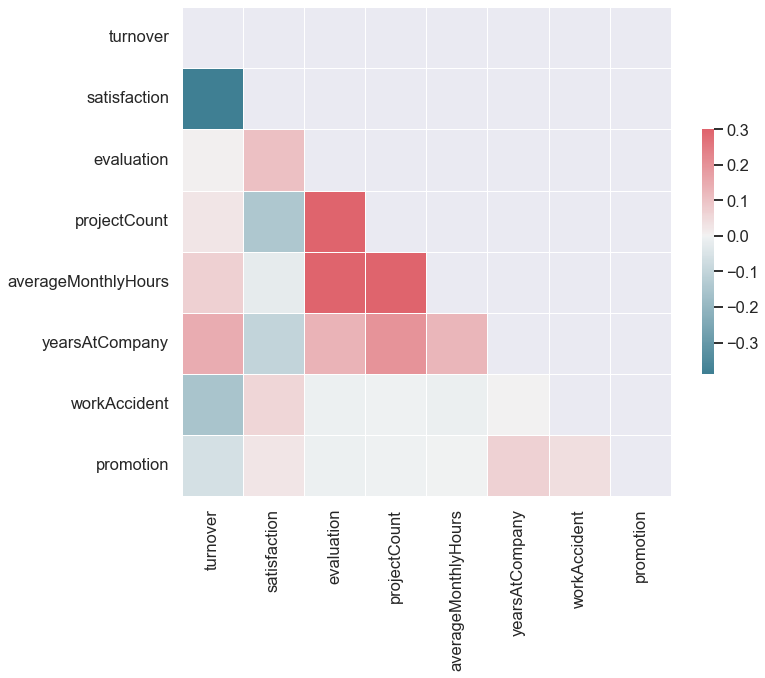

In [28]:
correlation_plot(df, cols=None)

** Que correlaciones positivas y negativas hay entre el turnover y el resto de variables?**

Correlaciones positivas:
    * variables?
    
Correlaciones negativas:
    * variables?

** Qué variables presentan correlaciones fuertes entre sí? **
  

***
#### 3.3 Investigando las correlaciones
***
Hemos visto que el abandono de la empresa esta fuertemente correlacionado con la satisfacción en la empresa.

Podemos determinar si existe una diferencia significativa entre la satisfacción de los empleados que continuan o que dimiten?

In [29]:
# Calcula la media y la desviación estandar de la satisfacción
# de los empleados que abandonan o se quedan en la empresa

df.groupby('turnover')['satisfaction'].mean()

turnover
0.0    0.666832
1.0    0.440043
Name: satisfaction, dtype: float64

In [30]:
# calcula la desviación estandar

df.groupby('turnover')['satisfaction'].std()

turnover
0.0    0.217100
1.0    0.263917
Name: satisfaction, dtype: float64

<AxesSubplot:xlabel='turnover', ylabel='satisfaction'>

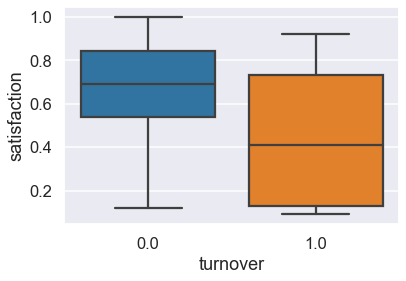

In [31]:
sns.boxplot(data=df, x='turnover', y='satisfaction')

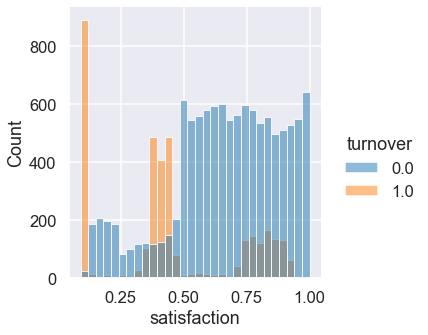

In [32]:
sns.displot(data=df, x='satisfaction', hue='turnover')

Realmente a partir de las medias y desviaciones obtenidas, así como por la dispersión de los datos en los plots, parece que tenemos una clara distinción en la satisfacción de la gente que abandona la empresa o se queda.

Podríamos darle un poco más de solidez haciendo un test estadístico?

In [33]:
#scipy es la libreria cientifica de python. Entre otras,
# contiene una librería muy potente de estadística con la que
# podremos hacer analísis de hipótesis.
from scipy import stats

In [34]:
# filtra el df de forma que devuelva solo los valores de satisfaccino
# que corresponden a gente que ha abandonado la empresa, i.e.: turnover == 1

valores_satisfaccion_abandono = df[df['turnover']==1]['satisfaction']

valores_satisfaccion_no_abandono = df[df['turnover']==0]['satisfaction']

$H_0: \mu(satisfaction)_{aband} = \mu(satisfaction)_{NoAband} $

$H_1: \mu(satisfaction)_{aband} \not=  \mu(satisfaction)_{NoAband} $

In [35]:
# Que test estadístico podríamos usar para evaluar la hipotesis nula?
ks_statistic, ks_p = stats.ks_2samp(valores_satisfaccion_abandono,
                                    valores_satisfaccion_no_abandono)
print(ks_statistic, ks_p)

0.5642011070639861 0.0


Podemos rechazar $H_0$?

**Parece ser que estamos llegando a una conclusión sólida de que los empleados menos satisfechos son los que tienen más riesgo de abandonar la empresa. Pero, que causa que los empleados estén insatisfechos?**

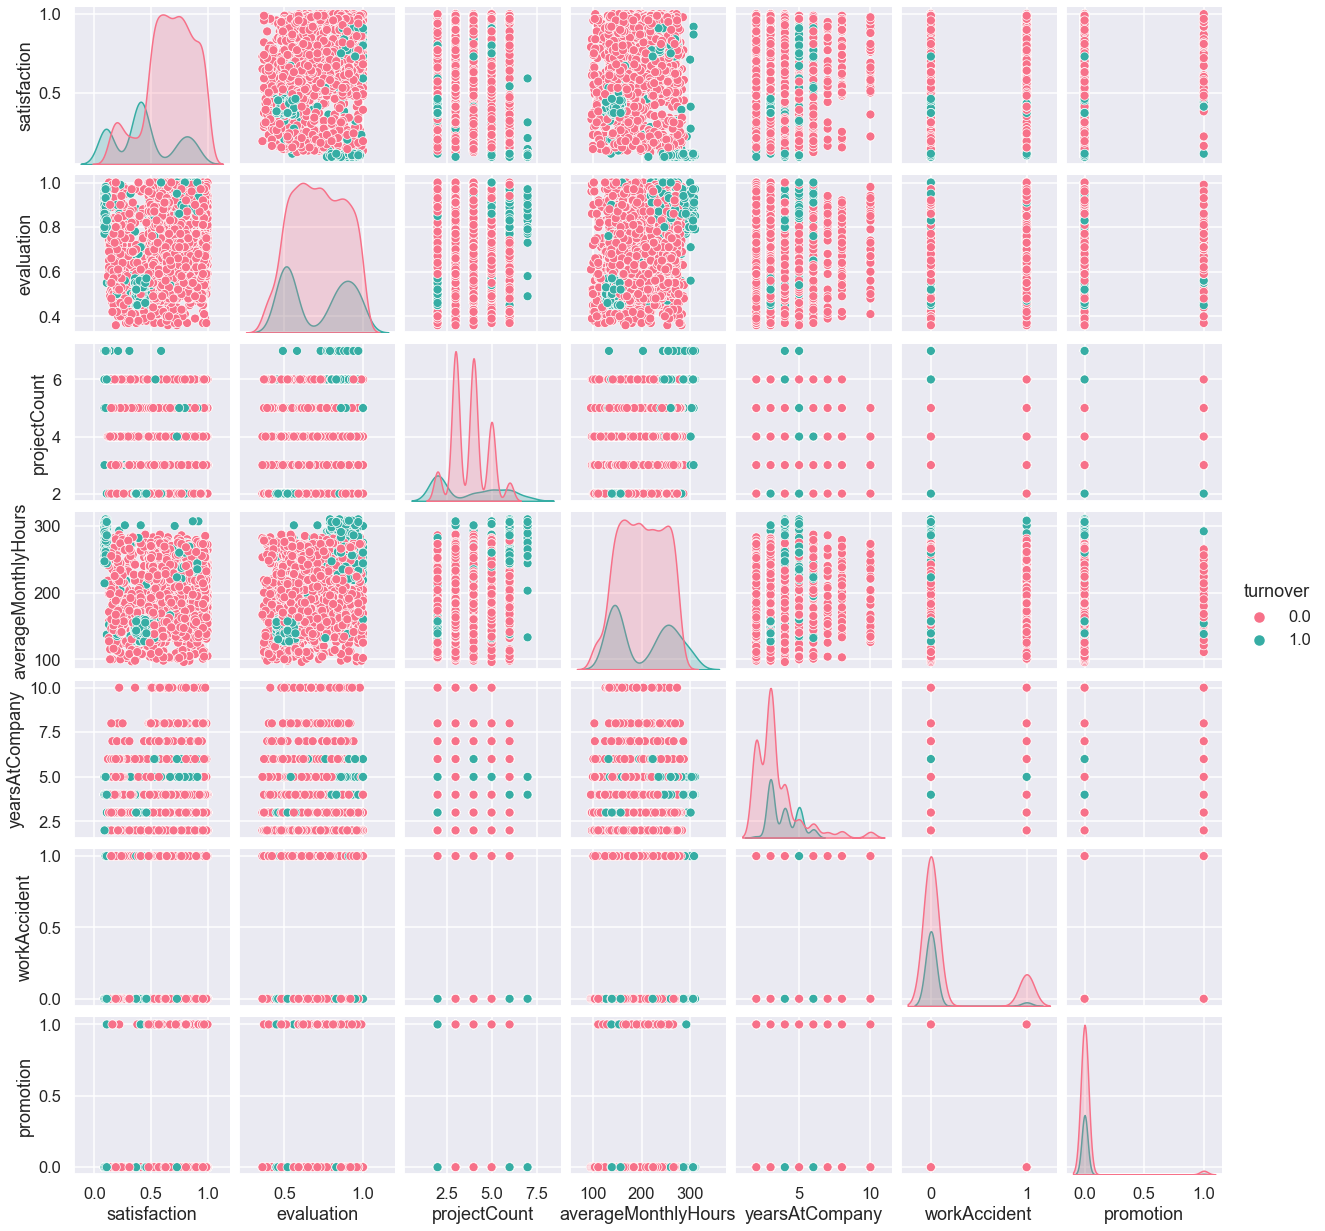

In [36]:
# Ejecuta la celda para ver el resultado de plotear variable a variable los scatter plots.
# En la diagonal apareceran los kde de los histogramas

sns.pairplot(data=df.sample(frac=0.2),
             hue='turnover',
             diag_kind='kde',
             palette="husl",)

Que conclusiones podemos sacar a partir de lo de arriba?

Te llama la atención el plot de satisfacción vs. evaluación?

### 3.4 Enfasis en salario

Por último, vamos a intentar ver una de las variables que hemos pasado por alto. El salario.

In [37]:
# muestra los valores de salarios que hay en la tabla
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [38]:
# Cómo se reparten los salarios entre los empleados

df['salary'].value_counts()

low       7315
medium    6445
high      1237
Name: salary, dtype: int64

In [39]:
# Investiguemos la repartición entre los que han abandonado la empresa y los que se han quedado

df.groupby('turnover')['salary'].value_counts()

turnover  salary
0.0       low       5143
          medium    5129
          high      1155
1.0       low       2172
          medium    1316
          high        82
Name: salary, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

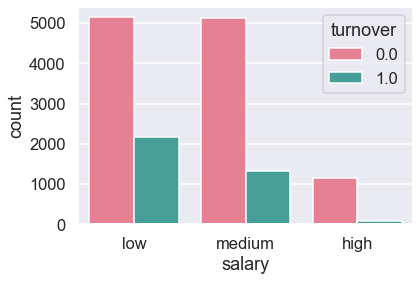

In [40]:
# hmmm, mejor veamoslo

sns.countplot(data=df, x='salary', hue='turnover', palette='husl')

Hmmm, los que menos cobrán son los que tienen más tendencia a irse de la empresa.

Podrías decir algo entre las horas trabajadas, el número de proyectos y el hecho de que los empleados se vayan?

<AxesSubplot:xlabel='projectCount', ylabel='averageMonthlyHours'>

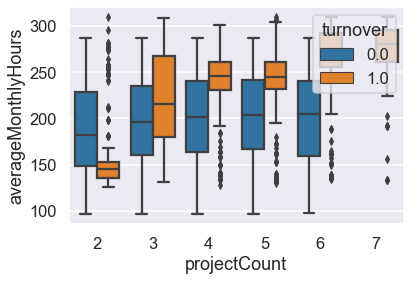

In [41]:
# usa la opción de boxplot de seaborn.
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

# Modelización

A estas alturas ya tenemos una idea de que variables pueden influirnos más a la hora de elaborar un modelos predictivo. Cada vez que desarrollemos un proyecto de ML, seguiremos esta aproximación:

1. EDA + Limpieza (lo que acabamos de hacer)
1. Determinar que métrica utilizaremos para determinar como de bien se comporta nuestro modelo
1. Separar en train y test nuestro data set de entrenamiento
1. Crear un modelo "dummy" de forma que sea la linea de base que utilizaremos para comparar nuestros modelos:
    * en el caso de una clasificacion, el modelo más sencillo es predecir el "prior", es decir, la probabilidad de que una persona abandone la empresa (vamos, la media del target)
1. Crear un modelo sencillo (modelo lineal) para explorar "que" está aprendiendo el modelo:
    * Una de las ventajas de los modelos lineales es que podremos explorar directamente que peso se le da a cada feature
1. Entrenar varios modelos para seleccionar que modelo nos funciona mejor (90% de los casos será un ensemble de arboles)
1. Utilizar validación cruzada y gridsearch para determinar cuales son los mejores parametros.

Igualmente, aunque parezca un proceso lineal, los proyecto de machine learning se caracterizan por ser de naturaleza iterativa. Hay varias metodologías que resumen el ciclo de vida, uno de los más conocidos es el CRISP-DM

**Cross-Industry Standard Process for the development of Machine Learning applications with Quality assurance methodology**

!["img/crisp-ml-process.jpeg"](img/crisp-ml-process.jpeg)

## Divide en train y test

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Queremos asegurarnos que la distribución de turnover es similar en train y test así que usaremos el stratify
df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     stratify=df['turnover'],
                                    )

## Comprueba que las distribuciones son iguales

In [44]:
df_train['turnover'].mean(), df_test['turnover'].mean()

(0.23805951487871968, 0.238)

## Creamos X_train, X_test, y_train, y_test

In [45]:
X_train = df_train.drop('turnover', axis=1)
y_train = df_train['turnover']

X_test = df_test.drop('turnover', axis=1)
y_test = df_test['turnover']

## Dummy classifier de sklearn

In [46]:
from sklearn.dummy import DummyClassifier

In [47]:
clf_dummy = DummyClassifier(strategy='prior')

In [48]:
clf_dummy.fit(X_train, y_train)

DummyClassifier()

In [49]:
y_hat_dummy = clf_dummy.predict_proba(X_test)

## Evaluamos usando la curva ROC

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
score_dummy = roc_auc_score(y_true=y_test, y_score=y_hat_dummy[:, 1])

In [52]:
print('score_dummy:', score_dummy)

score_dummy: 0.5


## Creamos un modelo lineal para ver el caso

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf_lr = LogisticRegression()

In [55]:
cols = ['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany']

In [56]:
clf_lr.fit(X_train[cols], y_train)

LogisticRegression()

In [57]:
y_hat_lr = clf_lr.predict_proba(X_test[cols])

In [58]:
score_lr = roc_auc_score(y_test, y_hat_lr[:, 1])

In [59]:
print('score_lr:', score_lr)

score_lr: 0.7712485694190186


## Vamos a revisar el modelo

In [60]:
for ix, col in enumerate(cols):
    print(col, clf_lr.coef_[0][ix])
print('intercept', clf_lr.intercept_[0])

satisfaction -4.116895082258057
evaluation 0.494869253363546
projectCount -0.29265671664912063
averageMonthlyHours 0.004207894424830079
yearsAtCompany 0.19620948448271353
intercept 0.31835003151770414


**Tienen sentido con respecto al know-how que hemos obtenido con respecto al EDA?**

**Tiene sentido comparar los parametros directamente ?**

## Entrenemos un random forest (no lineal)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf_rf = RandomForestClassifier()

In [63]:
clf_rf.fit(X_train[cols], y_train)

RandomForestClassifier()

In [64]:
y_hat_rf = clf_rf.predict_proba(X_test[cols])

In [65]:
score_rf = roc_auc_score(y_test, y_hat_rf[:, 1])

In [66]:
print(score_rf)

0.9893456945332815


**Not bad!** pero... como podemos estar seguros de que no hay Overfit ?

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
clf_rf = RandomForestClassifier()

In [69]:
param_grid = {'n_estimators':[30, 100], 'max_depth':[3, 4 , 5]}

In [70]:
clf_gs = GridSearchCV(estimator=clf_rf,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=5,
                      verbose=1)

In [71]:
clf_gs.fit(X_train[cols], y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'n_estimators': [30, 100]},
             scoring='roc_auc', verbose=1)

In [72]:
pd.DataFrame(clf_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.096151,0.014427,0.008743,0.001371,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.974997,0.978507,0.969211,0.975537,0.977311,0.975113,0.003206,6
1,0.247203,0.006193,0.018390,0.000323,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.974925,0.978031,0.972793,0.977400,0.976656,0.975961,0.001894,5
2,0.083752,0.002147,0.007384,0.000181,4,30,"{'max_depth': 4, 'n_estimators': 30}",0.979025,0.982480,0.975545,0.979976,0.979276,0.979260,0.002224,4
3,0.362355,0.070987,0.026530,0.002595,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.978371,0.981944,0.975939,0.979948,0.980213,0.979283,0.002020,3
4,0.138122,0.001404,0.011185,0.000177,5,30,"{'max_depth': 5, 'n_estimators': 30}",0.980250,0.984083,0.980050,0.982261,0.983004,0.981929,0.001566,2
5,0.447729,0.005899,0.027954,0.000231,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.981262,0.985713,0.979618,0.981396,0.982961,0.982190,0.002055,1


In [73]:
y_hat_rf_gs = clf_gs.predict_proba(X_test[cols])

In [74]:
score_rf_gs = roc_auc_score(y_test, y_hat_rf_gs[:, 1])

In [75]:
print('Score rf gs', score_rf_gs)

Score rf gs 0.9792161396492105
